# Logistic Regression Workshop - Python Version


## Introduction

In this workshop, we are going to learn the basics of logistic regression, understand the interpretation of the model's coefficients, and apply it in a Python environment. Logistic Regression is a powerful machine learning algorithm used for binary classification problems and is an essential part of a data scientist's toolkit.

## Workshop Objectives

- Understand the logistic regression model and how it differs from linear regression.
- Understand how to code in Python and how it is different from R.
- Learn how to implement logistic regression in Python and evaluate its performance.

## Scenario

We are given a dataset of 30 credit cardholders who were contacted during a campaign last year. The dataset includes:

- Upgraded: Whether the credit cardholder upgraded to a premium card (0 = No, 1 = Yes).
- Purchases: Total credit card purchases in '000$ from the last year.
- ExtraCards: Whether the credit cardholder ordered additional credit cards (at extra cost) for other household members (0 = No, 1 = Yes).

Our task is to build a logistic regression model using these features to answer the question: "Which of the existing credit cardholders should be the target for the campaign?".

This model will help us identify the characteristics of cardholders who are most likely to upgrade to a premium card, thereby aiding in the formulation of effective marketing strategies. For our analysis, we will be using Python.

In [1]:
#load the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Load your dataset
data = pd.read_excel('CreditCardUpgrade.xlsx')

In [3]:
# Viewing first few rows of the data
data.head()

,upgraded,purchases,extraCards
0,0,32.1007,0
1,1,34.3706,1
2,0,4.8749,0
3,0,8.1263,0
4,0,12.9783,0


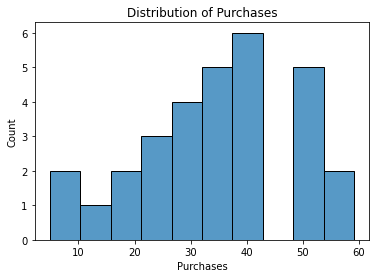

In [4]:
# Visualize data - you might want to adapt this part depending on your specific dataset and the questions you're interested in
# Always good to visualize your data before jumping into model building

sns.histplot(data=data, x='purchases', bins=10, kde=False)
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.title('Distribution of Purchases')
plt.show()

/var/folders/yy/mx9fzt217dqckjcglk6tbfv80000gn/T/ipykernel_59952/3641157899.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')


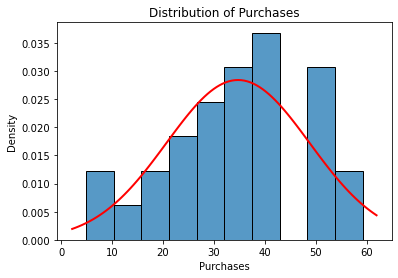

In [5]:
mu, std = data['purchases'].mean(), data['purchases'].std()

sns.histplot(data=data, x='purchases', bins=10, kde=False, stat='density')
plt.xlabel('Purchases')
plt.ylabel('Density')
plt.title('Distribution of Purchases')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='red')
plt.show()

In [6]:
# Split the data into training and testing sets
X = data[['purchases', 'extraCards']]
y = data['upgraded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Print the model's coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [-4.6852508]
Coefficients: [[0.10291895 1.3142994 ]]


In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

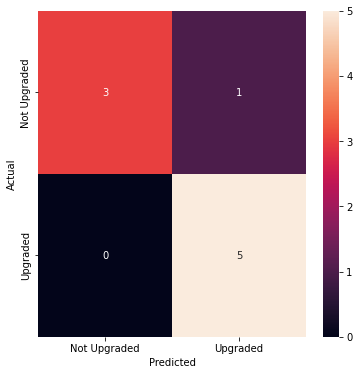

In [13]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Not Upgraded', 'Upgraded'], yticklabels=['Not Upgraded', 'Upgraded'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [10]:
# Compute and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8888888888888888


In [11]:
# Compute and print precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.8333333333333334
Recall: 1.0


In [12]:
# Compute and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Confusion Matrix: 
[[3 1]
 [0 5]]
